# Indian Rainfall Analysis

The 2019 Indian floods were a series of floods that affected over thirteen states in late July and early August 2019, due to incessant rains. At least 200 people died and about a million people were displaced. Karnataka and Maharashtra were the most severely affected states.

It was the heaviest monsoon in the last 25 years. More than 1600 people died between June and October 2019.

India being an agriculturally driven economy, it will be interesting to study the rainfall in India in the past decade to give us an idea of the changes in the pattern if there are any.

Let us work on the INDIAN RAINFALL DATA!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/rkkirpane/-Statistics-Part-I/master/rainfall%20in%20india%201901-2015.csv')

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [25]:
#Range of year value considered in the dataset.
print(data['YEAR'].max(),data['YEAR'].max())
#India is a federal union comprising 28 states and 8 union territories,for a total of 36 entities.
print(len(data['SUBDIVISION'].unique()))
#4 Seasons considered : a)Winter :Jan-Feb b)Summer rains :Mar-May) c)Monsoon or rainy :June-Sept d)Post-monsoon :Oct-Dec.


2015 2015
36


## Summary of the data

In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

## Inspect the data, find missing values and replace them with appropriate values

In [ ]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
data.iloc[:,2:].columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
# Iterating through all the numeric features and replacing the null values with mean.
for feature in data.iloc[:,2:].columns:
    data[feature].fillna(data[feature].mean(),inplace = True) #fillna() function is used to fill NA/NaN values using the specified method.
    
# checking for null values
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

## Plot the mean annual rainfall and note down your observations regarding the same

**MOVING AVERAGE OR ROLLING MEAN :**

The moving average is commonly used with time series to smooth random short-term variations and to highlight other components (trend, season, or cycle) present in your data. 

Pandas provides a more efficient way to calculate moving averages. 
* Call pandas.Series.rolling(window_size) with pandas.Series as the previous result to get an object containing each window. 

* Call pandas.Series.mean() with pandas.Series as the previous result to find the average of each window.





<img src='https://miro.medium.com/max/968/1*FLCKsDufQ-hLkwGcJrBX6g.png' width=500>

In [33]:
data.groupby("YEAR")['ANNUAL'].mean()

YEAR
1901    1284.214286
1902    1337.302857
1903    1399.908824
1904    1236.771429
1905    1186.177143
           ...     
2011    1392.955556
2012    1243.557143
2013    1475.172222
2014    1244.336111
2015    1280.583333
Name: ANNUAL, Length: 115, dtype: float64

In [34]:
data['ANNUAL'].min()

62.3

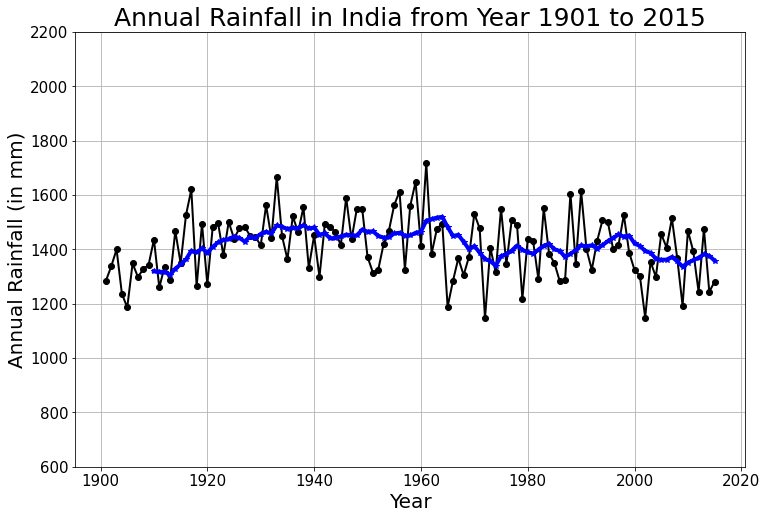

In [42]:
# Plotting the mean annual rainfall
ax = data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(600,2200),color='black',marker='o',linestyle='-',linewidth=2,figsize=(12,8))

# Finding the moving average taking into consideration a period of 10 years and plotting
data['MA10'] = data.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean().plot(color='b',linewidth=4,marker='*')


#data.MA10.plot(color='b',linewidth=4,marker='*')

# Aesthetic of the plot
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

* Highest average rainfall in India was recored in the year 1961.This was because in 1961 India received multiple cyclones.City of Pune was flooded in the year 1961 which is remembered as Panshet Flood.

* Year 1965-66 were twin drought years and there was food scarcity in India.Prime Minister Lal Bahadur Shastri gave the Slogan Jai Jawan Jai Kissan to people of India.This lead to green revolution in India making India a food surplus country in the coming decades.

* The red line is the 10 year moving average of the rainfall in India.It seems since 1960s there is slight dip in the rainfall in India.Now a days due to global warming the period of Monsoon season has shortned.We see more of erratic rainfall pattern.This needs more study.

## Similarly analyze the seasonal rainfall as per subdivisions and note down your observations

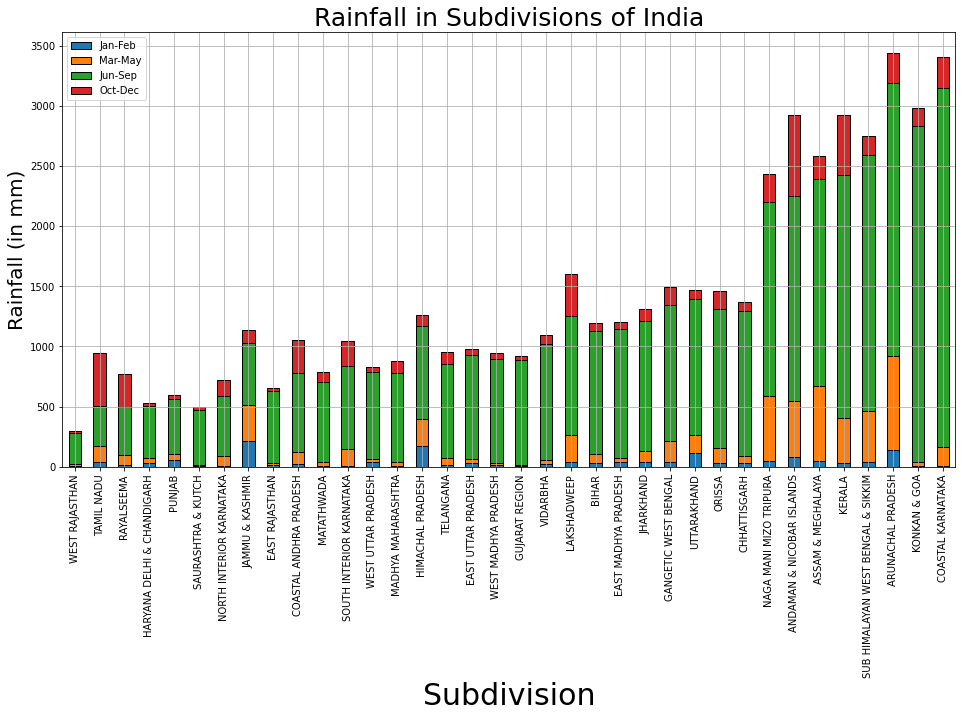

In [44]:
# Plotting a bar plot of the mean seasonal rainfall
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));

# Aesthetic of the plot
plt.xlabel('Subdivision',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()



* From the above graph we can see that majority of rainfall is received in the month of Jun-Sep which is the Monsoon season.Oct-Dec is time of return monsoon.Jan-Feb are the winter months.Mar-May is time for Summer rains.

* Coastal Karnataka,Arunachal Pradesh,Konkan Goa and Kerala receive highest rainfall.

* Rajastan,Gujrat,Haryana and Punjab receives low rainfall.Interesting thing is that Punjab and Haryana have high agricultural output despite low rainfall.Their water requirnments are met by rivers and canals.



## With boxplot analyze the distribution of rainfall in various states and note down your observations

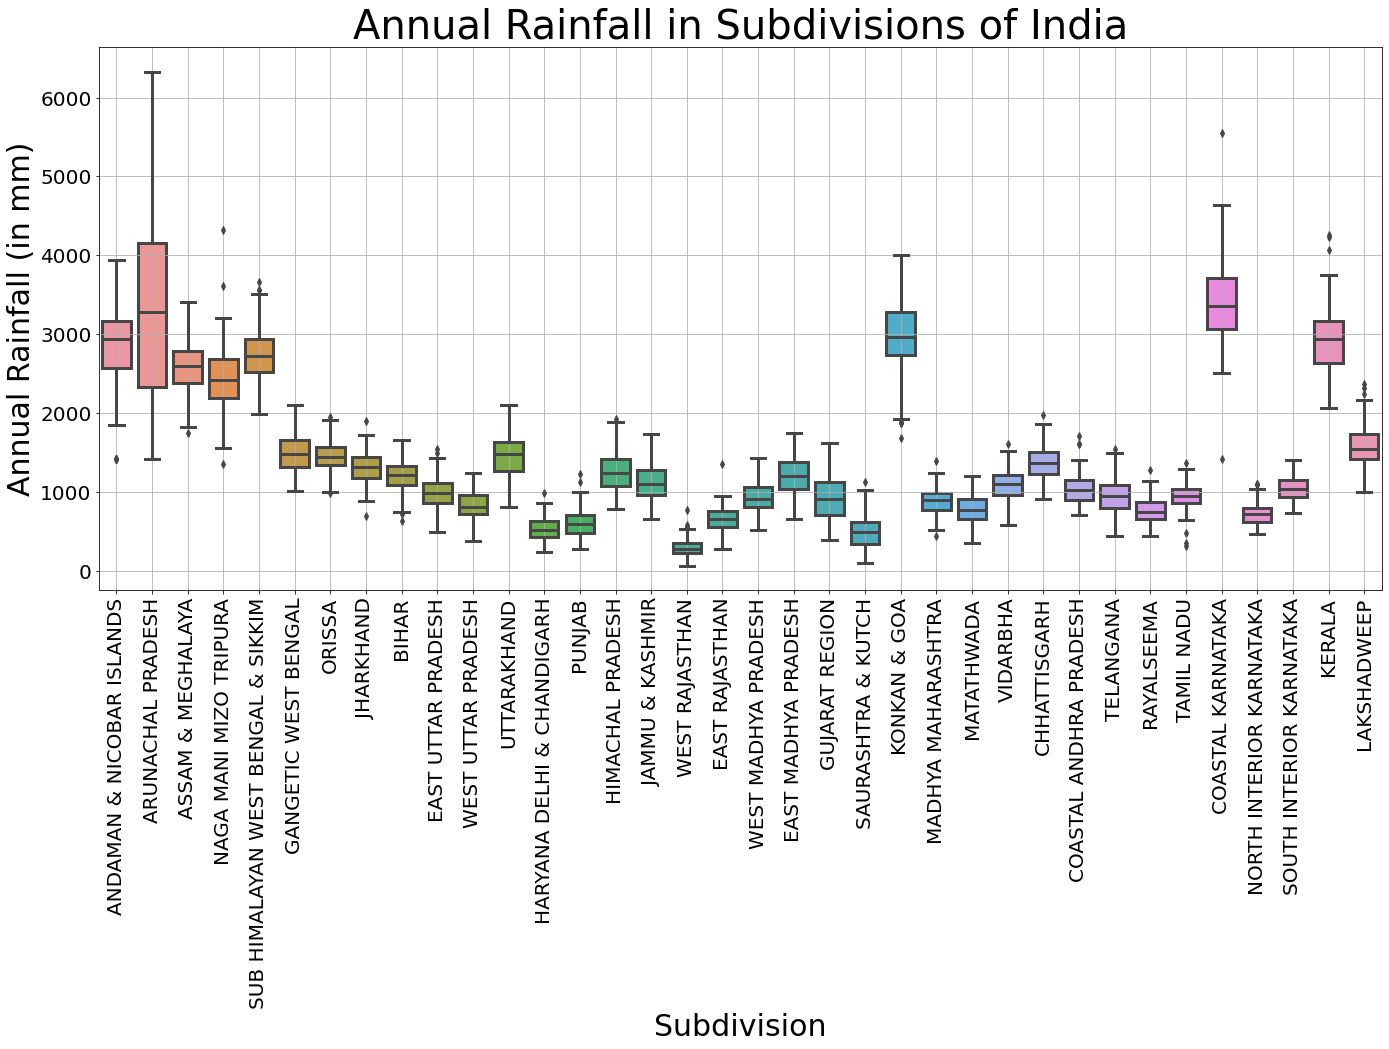

In [ ]:
plt.rcParams['figure.figsize']=(23,10)

# Creating boxplot as per subdivsions
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=data,width=0.8,linewidth=3)

# Aestehtics of the plot
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

We can see Subdivision Arunachal Pradesh shows highest difference between Maximum and Minimum rainfall received.

Costal Karnataka receives close to 3400 mm of Annual rainfall which is the highest in India.West Rajastan receives the least amount of rainfall.



## Analyze the rainfall through years in Kerala and note down your observations

In [ ]:
Kerala = data[data.SUBDIVISION == 'KERALA']


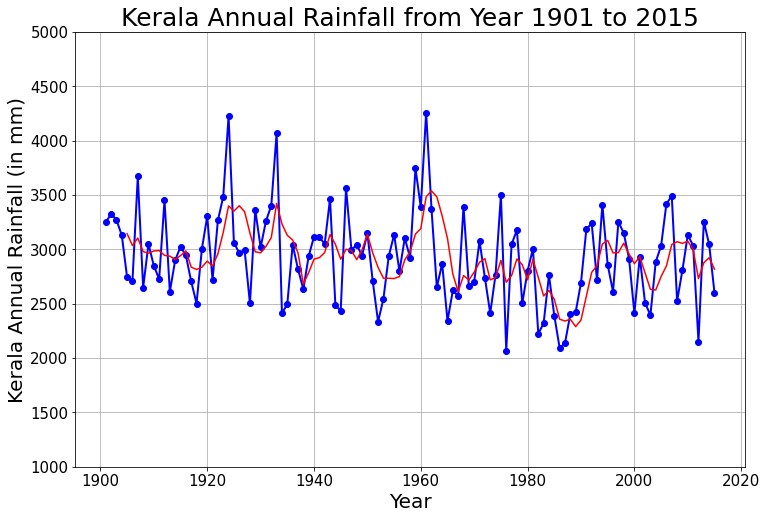

In [50]:
# Plotting the average annual rainfall 
ax=Kerala.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,5000),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
Kerala.groupby("YEAR")["ANNUAL"].mean().rolling(5).mean().plot(color="r")
# Setting up the aesthetics of the plot
plt.xlabel('Year',fontsize=20)
plt.ylabel('Kerala Annual Rainfall (in mm)',fontsize=20)
plt.title('Kerala Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

Prior to 2018 Kerala had major flood in the year 1924 which is evident in the data.Contrary to popular belief Kerala received maximum annual rainfall in year 1961(4257 mm) and not 1924(4226 mm).In 2018 Kerala has received 2226.4 mm of rain in the monsoon season.This is 40% more than the average rainfall.

## Read the district wise rainfall data

In [ ]:
Dist = pd.read_csv('https://raw.githubusercontent.com/rkkirpane/-Statistics-Part-I/master/district%20wise%20rainfall%20normal.csv')

In [ ]:
Dist.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


## Annual rainfall in different districts of Kerala

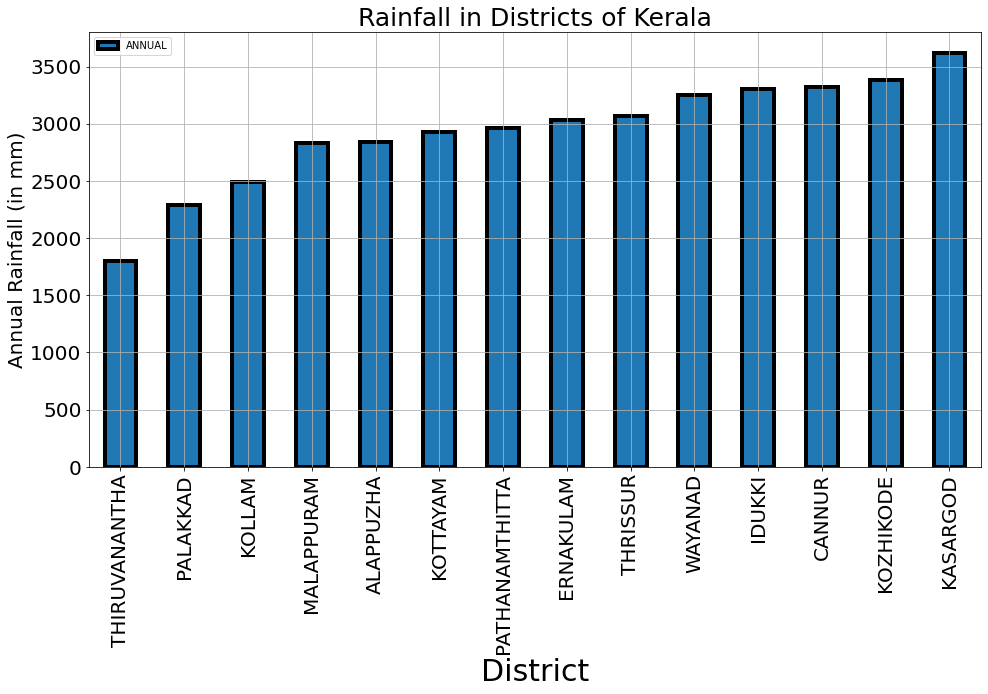

In [53]:
# subsetting the Kerala state data
KDist=Dist[Dist.STATE_UT_NAME == 'KERALA']
k=KDist.sort_values(by=['ANNUAL'])

# plotting a bar plot to check districwise rainfall in Kerala
#ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8)).tick_params(labelsize=20)
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Districts of Kerala',fontsize=25)
#ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

## Find out the districts with least rainfall

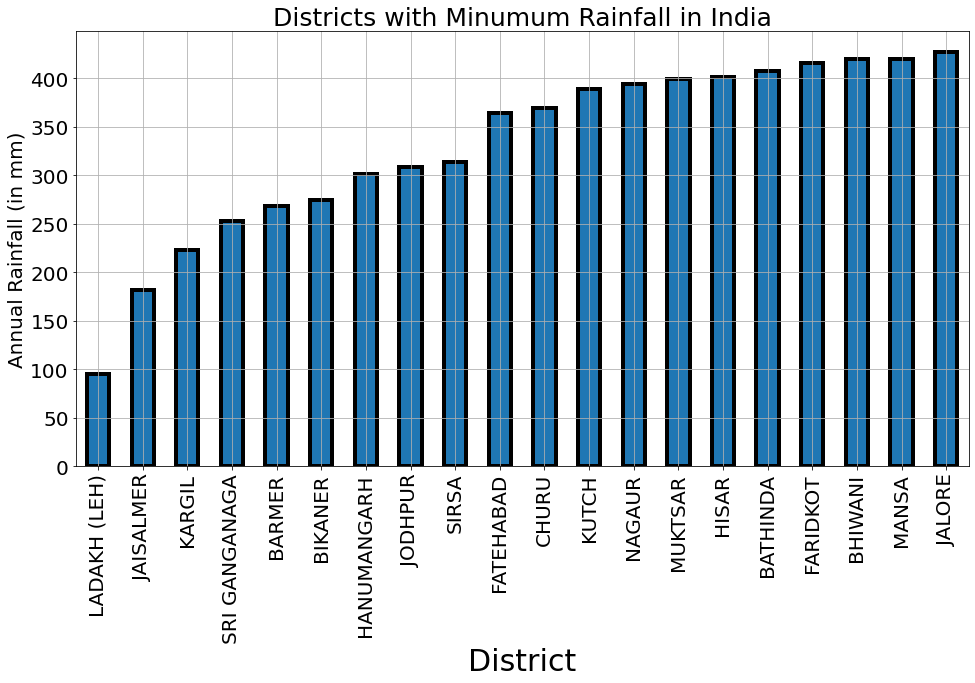

In [ ]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))

plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minumum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

Ladak which is part of Jammu and Kashmir receives 94.6 mm. Ladak and Kargil which receive less rainfall are part of Indian State Jammu and Kashmir.Jaisalmer,Sri Ganganaga and Barmer are part of Rajastan State.



## Similarly, find districts with maximum rainfall

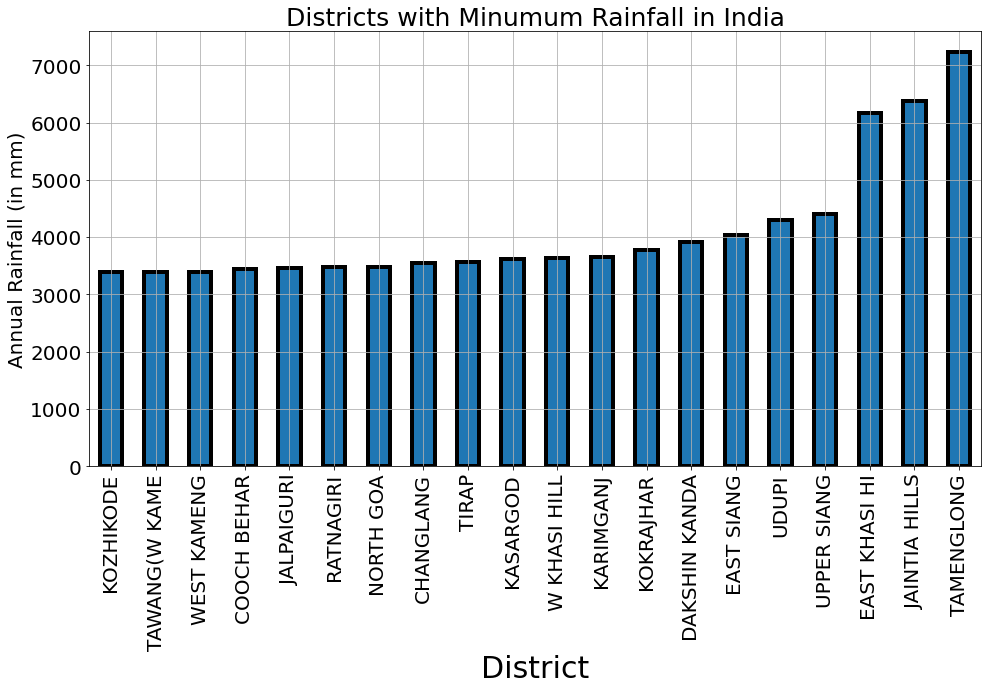

In [ ]:
ax=Dist.groupby(['DISTRICT'])['ANNUAL'].max().sort_values().tail(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))

plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minumum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()